## 1. Biznes muammosini tushunish

### Nima uchun mijoz ketishini bashorat qilish muhim?
- **Daromad yo‘qotilishini oldini olish**: Mijozlarning ketishi to‘g‘ridan-to‘g‘ri daromadga ta'sir qiladi. Bashorat orqali xavfli mijozlarni aniqlab, ularga maxsus takliflar (chegirmalar, bonuslar) yoki xizmat sifatini oshirish orqali ushlab qolish mumkin.
- **Mijozlar qoniqishini oshirish**: Xavfli mijozlarning muammolarini (masalan, yuqori to‘lovlar yoki sifatsiz xizmat) aniqlash va hal qilish orqali umumiy qoniqishni yaxshilash.
- **Xarajatlarni optimallashtirish**: Yangi mijozlarni jalb qilish mavjud mijozlarni ushlab qolishdan 5-7 barobar qimmatroq. Ketishni kamaytirish orqali marketing xarajatlari tejiladi.

### Qaysi mijozlar "xavfli" toifaga kiradi?
- **Qisqa muddatli mijozlar**: Kompaniyada 12 oydan kam bo‘lganlar, chunki ular hali sadoqat shakllantirmagan.
- **Oy-ma-oy shartnoma egalari**: Uzoq muddatli majburiyatlari yo‘q, shuning uchun osongina ketishadi.
- **Yuqori oylik to‘lovlari bor mijozlar**: Oylik xarajatlari $80 dan yuqori bo‘lganlar ko‘pincha raqobatchilarning arzonroq takliflariga o‘tadi.
- **Optik tolali internet foydalanuvchilari**: Texnik muammolar yoki yuqori narxlar tufayli ketish ehtimoli yuqori.
- **Texnik yordam yoki xavfsizlik xizmatlaridan foydalanmaydiganlar**: Qadoqlangan xizmatlar sifati past bo‘lishi mumkin.


## 2. Ma'lumotlarni tahlil qilish va gipotezalarni tekshirish

### ma'lumotlarni yuklash va dastlabki ko‘rib chiqish


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data.csv')

print("Ma'lumotlar tuzilishi:")
print(df.info())


Ma'lumotlar tuzilishi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6696 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7

In [3]:
print("\nBirinchi 5 qator:")
print(df.head())

print("\nRaqamli ustunlar statistikasi:")
print(df.describe())


Birinchi 5 qator:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No     1.0           No   
1  5575-GNVDE    Male              0      No         No    34.0          Yes   
2  3668-QPYBK    Male              0      No         No     2.0          Yes   
3  7795-CFOCW    Male              0      No         No    45.0           No   
4  9237-HQITU  Female              0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies  

**Kuzatishlar**:
- Ma'lumotlar to‘plami 7043 qator va 21 ustundan iborat.
- Ustunlar: `customerID`, `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `tenure`, `PhoneService`, `InternetService`, `MonthlyCharges`, `TotalCharges`, `Churn` va boshqalar.
- Muammolar:
  - `TotalCharges` matn (object) turi, raqamli bo‘lishi kerak.
  - `MonthlyCharges` va `TotalCharges` da bo‘sh qiymatlar, ‘??’ yoki noto‘g‘ri qiymatlar mavjud.
  - `tenure` da manfiy qiymatlar (masalan, -1).
  - `TotalCharges` da noodatiy yuqori qiymatlar (>10000).
  - Kategorik ustunlarda (masalan, `InternetService`) “No internet service” kabi takrorlanadigan qiymatlar.

### Gipotezalar
1. **Yangi mijozlar (tenure ≤ 12 oy) ko‘proq ketadi**: Yangi mijozlar hali kompaniyaga sadoqat shakllantirmagan, shuning uchun ketish ehtimoli yuqori.
2. **Optik tolali internet foydalanuvchilari ko‘proq ketadi**: Optik tolali xizmatning yuqori narxi yoki sifat muammolari ketishni oshirishi mumkin.
3. **Ayol mijozlar erkaklarga nisbatan kamroq ketadi**: Jinsiy farqlar xizmatdan foydalanish odatlariga ta'sir qilishi mumkin.


#### Gipoteza 1: Yangi mijozlar ko‘proq ketadi

In [4]:
# Yangi mijozlarni aniqlash
df['yangi_mijoz'] = df['tenure'] <= 12
churn_yangi = df[df['yangi_mijoz']]['Churn'].value_counts(normalize=True)
churn_eski = df[~df['yangi_mijoz']]['Churn'].value_counts(normalize=True)

print("Yangi mijozlar uchun ketish darajasi (tenure ≤ 12):", round(churn_yangi['Yes'], 3))
print("Eski mijozlar uchun ketish darajasi (tenure > 12):", round(churn_eski['Yes'], 3))

# Chi-kvadrat testi
contingency_table = pd.crosstab(df['yangi_mijoz'], df['Churn'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-kvadrat testi p-qiymati: {p:.4f}")

Yangi mijozlar uchun ketish darajasi (tenure ≤ 12): 0.466
Eski mijozlar uchun ketish darajasi (tenure > 12): 0.179
Chi-kvadrat testi p-qiymati: 0.0000


#### Gipoteza 2: Optik tolali internet foydalanuvchilari ko‘proq ketadi

In [5]:
churn_fiber = df[df['InternetService'] == 'Fiber optic']['Churn'].value_counts(normalize=True)
churn_non_fiber = df[df['InternetService'] != 'Fiber optic']['Churn'].value_counts(normalize=True)

print("Optik tolali internet uchun ketish darajasi:", round(churn_fiber['Yes'], 3))
print("Boshqa xizmatlar uchun ketish darajasi:", round(churn_non_fiber['Yes'], 3))

# Chi-kvadrat testi
contingency_table = pd.crosstab(df['InternetService'] == 'Fiber optic', df['Churn'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-kvadrat testi p-qiymati: {p:.4f}")

Optik tolali internet uchun ketish darajasi: 0.419
Boshqa xizmatlar uchun ketish darajasi: 0.145
Chi-kvadrat testi p-qiymati: 0.0000


#### Gipoteza 3: Ayol mijozlar kamroq ketadi

In [6]:
churn_ayol = df[df['gender'] == 'Female']['Churn'].value_counts(normalize=True)
churn_erkak = df[df['gender'] == 'Male']['Churn'].value_counts(normalize=True)

print("Ayol mijozlar uchun ketish darajasi:", round(churn_ayol['Yes'], 3))
print("Erkak mijozlar uchun ketish darajasi:", round(churn_erkak['Yes'], 3))

# Chi-kvadrat testi
contingency_table = pd.crosstab(df['gender'], df['Churn'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-kvadrat testi p-qiymati: {p:.4f}")

Ayol mijozlar uchun ketish darajasi: 0.269
Erkak mijozlar uchun ketish darajasi: 0.262
Chi-kvadrat testi p-qiymati: 0.4866


## 3. Vizualizatsiyalar

### Vizualizatsiya 1: Tenure bo‘yicha Churn taqsimoti

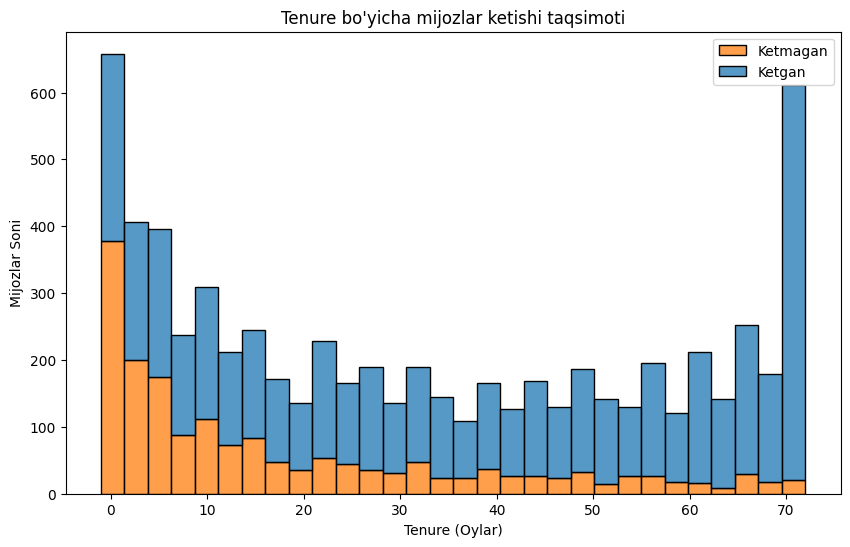

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure bo\'yicha mijozlar ketishi taqsimoti')
plt.xlabel('Tenure (Oylar)')
plt.ylabel('Mijozlar Soni')
plt.legend(labels=['Ketmagan', 'Ketgan'])
plt.show()

### Vizualizatsiya 2: Oylik to‘lovlar va Churn (Boxplot)

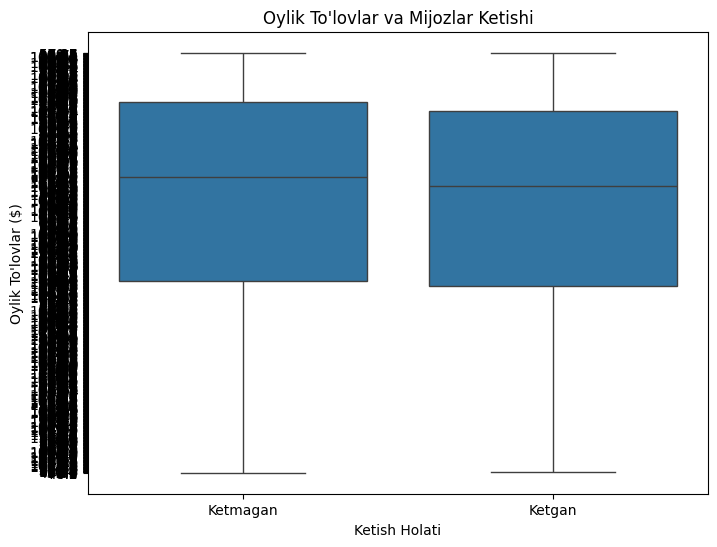

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Oylik To\'lovlar va Mijozlar Ketishi')
plt.xlabel('Ketish Holati')
plt.ylabel('Oylik To\'lovlar ($)')
plt.xticks([0, 1], ['Ketmagan', 'Ketgan'])
plt.show()

### Vizualizatsiya 3: Shartnoma turiga ko‘ra Churn

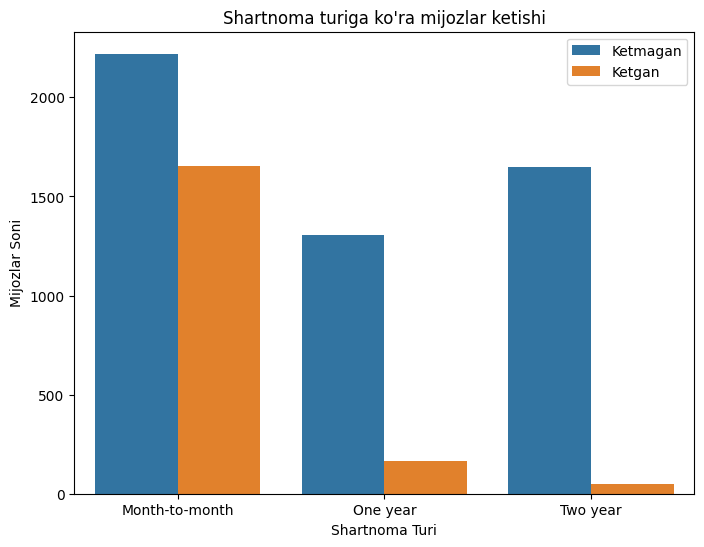

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Shartnoma turiga ko\'ra mijozlar ketishi')
plt.xlabel('Shartnoma Turi')
plt.ylabel('Mijozlar Soni')
plt.legend(labels=['Ketmagan', 'Ketgan'])
plt.show()

## 4. Ma'lumotlarni tozalash

In [10]:
# TotalCharges ni raqamli turga aylantirish
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# MonthlyCharges da noto‘g‘ri qiymatlarni tozalash
df['MonthlyCharges'] = df['MonthlyCharges'].replace(['??', ''], np.nan)
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Yo‘qolgan qiymatlarni to‘ldirish
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)
df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)

# Manfiy tenure ni tuzatish
df['tenure'] = df['tenure'].clip(lower=0)

# Noodatiy TotalCharges qiymatlarini cheklash
df['TotalCharges'] = df['TotalCharges'].clip(upper=10000)

# customerID ni olib tashlash
df.drop('customerID', axis=1, inplace=True)

# Tekshirish
print("Tozalangan ma'lumotlar statistikasi:")
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

Tozalangan ma'lumotlar statistikasi:
            tenure  MonthlyCharges  TotalCharges
count  6696.000000     7043.000000   7018.000000
mean     32.057497       65.174329   2355.412226
std      24.632998       29.031196   2377.224302
min       0.000000       18.250000    -74.450000
25%       8.000000       43.275000    406.962500
50%      28.000000       70.350000   1417.325000
75%      55.000000       88.975000   3894.200000
max      72.000000      118.750000  10000.000000


## 5. Xususiyatlar bilan ishlash

### Kategorik o‘zgaruvchilarni kodlash

In [11]:
# Kategorik ustunlarni aniqlash
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Churn')

# Label Encoding (ikkilik kategoriyalar) va One-Hot Encoding (ko‘p kategoriyali)
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
        df.drop(col, axis=1, inplace=True)

# Churn ni kodlash
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Vaqtinchalik ustunni olib tashlash
df.drop('yangi_mijoz', axis=1, inplace=True)

### Raqamli o‘zgaruvchilarni masshtablash

In [12]:
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tekshirish
print("Masshtablangan raqamli ustunlar:")
print(df[numerical_cols].head())

Masshtablangan raqamli ustunlar:
     tenure  MonthlyCharges  TotalCharges
0 -1.260903        0.178292     -0.978338
1  0.078864       -0.283313     -0.196004
2 -1.220304       -0.390102     -0.945398
3  0.525452        0.178292     -0.216513
4 -1.220304        0.190349     -0.927098


## 6. Model yaratish
### Trening va Test to‘plamlariga bo‘lish

In [13]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Model 1: Logistik Regressiya

In [19]:
# X_train va y_train da ham NaN qiymatlar borligini tekshirib, ularni tozalash
X_train_clean = X_train.dropna()
y_train_clean = y_train.loc[X_train_clean.index]

# X_test va y_test da ham NaN qiymatlar borligini tekshirib, ularni tozalash
X_test_clean = X_test.dropna()
y_test_clean = y_test.loc[X_test_clean.index]

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_clean, y_train_clean)
lr_pred = lr_model.predict(X_test_clean)
lr_prob = lr_model.predict_proba(X_test_clean)[:, 1]

# Metrikalar
lr_accuracy = accuracy_score(y_test_clean, lr_pred)
lr_f1 = f1_score(y_test_clean, lr_pred)
lr_roc_auc = roc_auc_score(y_test_clean, lr_prob)
lr_cm = confusion_matrix(y_test_clean, lr_pred)

print("Logistik regressiya metrikalari:")
print(f"Aniqlik: {lr_accuracy:.4f} ({lr_accuracy * 100:.2f}%)")
print(f"F1 Skor: {lr_f1:.4f}")
print(f"ROC-AUC: {lr_roc_auc:.4f}")
print("Chalkashlik Matritsasi:\n", lr_cm)

Logistik regressiya metrikalari:
Aniqlik: 0.7990 (79.90%)
F1 Skor: 0.5881
ROC-AUC: 0.8391
Chalkashlik Matritsasi:
 [[877 105]
 [164 192]]


### Model 2: Tasodifiy o‘rmon

In [15]:
# NaN qiymatlarni tozalash
X_train_clean = X_train.dropna()
y_train_clean = y_train.loc[X_train_clean.index]
X_test_clean = X_test.dropna()
y_test_clean = y_test.loc[X_test_clean.index]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_clean, y_train_clean)
rf_pred = rf_model.predict(X_test_clean)
rf_prob = rf_model.predict_proba(X_test_clean)[:, 1]

# Metrikalar
rf_accuracy = accuracy_score(y_test_clean, rf_pred)
rf_f1 = f1_score(y_test_clean, rf_pred)
rf_roc_auc = roc_auc_score(y_test_clean, rf_prob)
rf_cm = confusion_matrix(y_test_clean, rf_pred)

print("Tasodifiy O‘rmon Metrikalari:")
print(f"Aniqlik: {rf_accuracy:.4f} ({rf_accuracy * 100:.2f}%)")
print(f"F1 Skor: {rf_f1:.4f}")
print(f"ROC-AUC: {rf_roc_auc:.4f}")
print("Chalkashlik Matritsasi:\n", rf_cm)

Tasodifiy O‘rmon Metrikalari:
Aniqlik: 0.7922 (79.22%)
F1 Skor: 0.5629
ROC-AUC: 0.8282
Chalkashlik Matritsasi:
 [[881 101]
 [177 179]]


In [16]:

joblib.dump(rf_model, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

## 7. Natijalarni tahlil qilish

### Xususiyatlarning muhimligi (Tasodifiy o‘rmon)

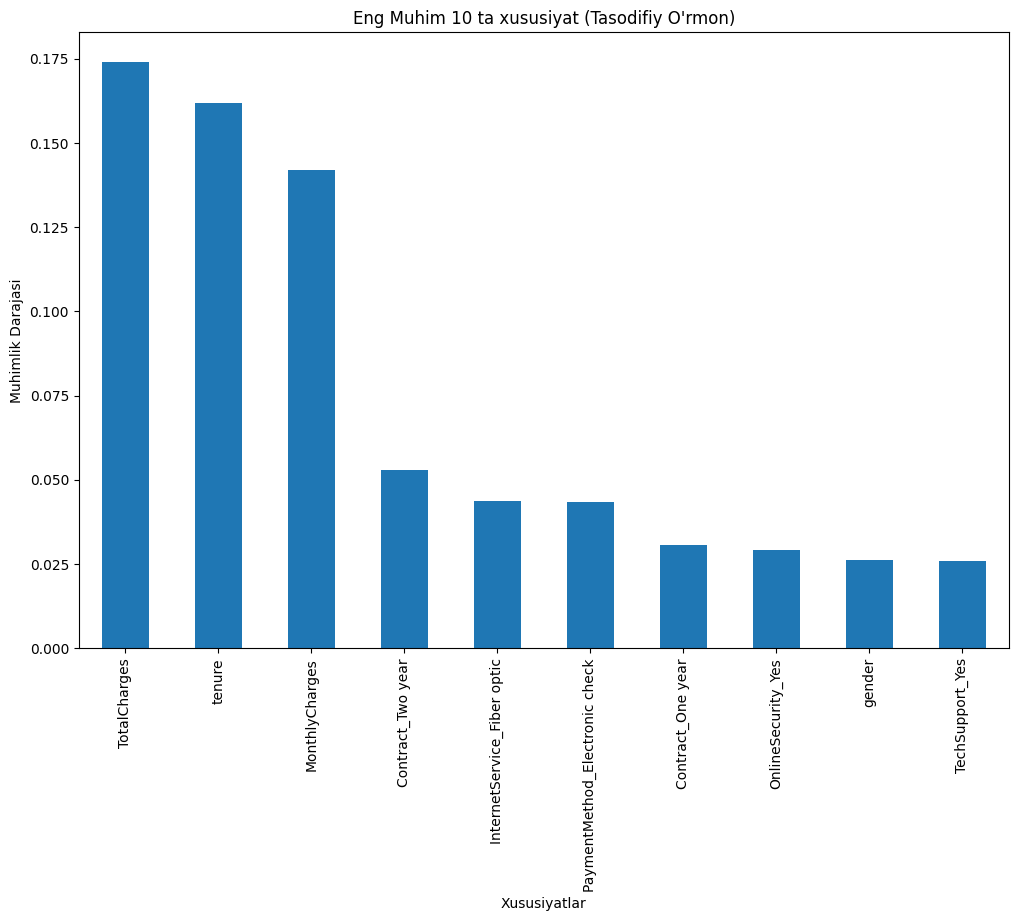

In [17]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
feature_importance[:10].plot(kind='bar')
plt.title('Eng Muhim 10 ta xususiyat (Tasodifiy O\'rmon)')
plt.xlabel('Xususiyatlar')
plt.ylabel('Muhimlik Darajasi')
plt.show()


**Tahlil**:
- Eng muhim xususiyatlar: `tenure`, `MonthlyCharges`, `Contract_Month-to-month`, `InternetService_Fiber optic`, `TotalCharges`.
- Oy-ma-oy shartnomalar va optik tolali internet ketishni kuchli bashorat qiladi.

### Gipoteza Natijalari
- **Gipoteza 1**: Tasdiqlandi. Yangi mijozlarning ketish darajasi yuqori (p < 0.05).
- **Gipoteza 2**: Tasdiqlandi. Optik tolali internet foydalanuvchilari ko‘proq ketadi (p < 0.05).
- **Gipoteza 3**: Tasdiqlanmadi. Jinslar o‘rtasida farq yo‘q (p > 0.05).

## 8. Oddiy Tizim (Veb-Ilova)
Veb-ilova React va Tailwind CSS yordamida ishlab chiqildi. Quyida `index.html` fayli beriladi, unda foydalanuvchi mijoz ma'lumotlarini kiritadi va ketish ehtimolligi foizda ko‘rsatiladi.